## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 08 : Deep Learning </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-04-13 08:47:23.316843
Device ID: 	22ac875f-d99d-11ed-ab4c-088fc3234331



---

### Dataset yang dipakai:

1. [Chinese MNIST in CSV - Digit Recognizer] – sumber : [https://www.kaggle.com/datasets/fedesoriano/chinese-mnist-digit-recognizer]

---

### Hasil kerja

#### Import Libraries

In [6]:
import sys
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np

#### Testing the Environment

In [3]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.2
Scikit-Learn 1.1.1


## TensorFlow with Convolutional Neural Networks (CNN)

#### Import Libraries

In [9]:
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

#### Read Data

In [44]:
# read data
df = pd.read_csv('chineseMNIST.csv')
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,...,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,...,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,...,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,...,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,...,0,0,0,0,0,9,九


In [45]:
print(df['character'].unique())

['九' '十' '百' '千' '万' '亿' '零' '一' '二' '三' '四' '五' '六' '七' '八']


#### Encode the Chinese Character

In [46]:
# Encode with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['character_encoded'] = le.fit_transform(df['character'].values)
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,...,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character,character_encoded
0,0,0,0,0,0,0,0,...,0,0,0,0,9,九,4
1,0,0,0,0,0,0,0,...,0,0,0,0,9,九,4
2,0,0,0,0,0,0,0,...,0,0,0,0,9,九,4
3,0,0,0,0,0,0,0,...,0,0,0,0,9,九,4
4,0,0,0,0,0,0,0,...,0,0,0,0,9,九,4


#### Split Data

In [55]:
x = df.iloc[:, 0:4096]
y = df.iloc[:, [4098]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test= x_test.to_numpy()
y_test= y_test.to_numpy()

x_train = x_train.reshape(x_train.shape[0], 64, 64, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1).astype('float32')

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (12000, 64, 64, 1)
Shape of y_train: (12000, 1)

Shape of x_test: (3000, 64, 64, 1)
Shape of y_test: (3000, 1)


#### Displaying Digits

In [56]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Chinese MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(64, 64))

Shape for dataset: (12000, 64, 64, 1)
Labels: [[3]
 [3]
 [0]
 ...
 [7]
 [4]
 [0]]
Shape for single: (64, 64, 1)


,0,1,2,3,4,5,6,...,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Display as image

Image (#105): Which is digit '[3]'


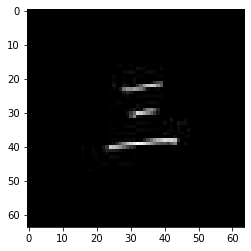

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 105 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit, y_train[digit]))

#### Show the figure

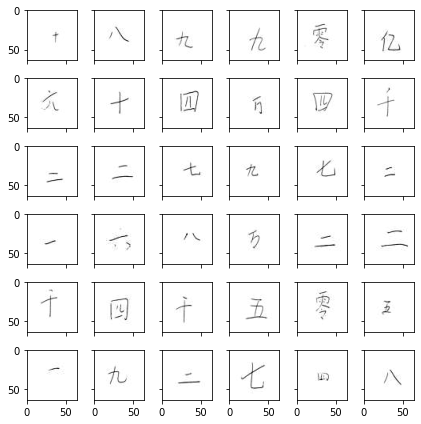

In [59]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf

fig, axes = plt.subplots(ROWS, ROWS,
                         figsize=(ROWS, ROWS),
                         sharex=True, sharey=True)

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (64, 64))
    ax.imshow(plottable_image, cmap='gray_r')

    ax.set_xbound([0, 64])

plt.tight_layout()
plt.show()

#### Split Data before Make a CNN Model

In [62]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 15
epochs = 12

# input image dimensions
img_rows, img_cols = 64, 64
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255
y_test = y_test.astype('float32')

print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (12000, 64, 64, 1)
Training samples: 12000
Test samples: 3000


#### Training the CNN – DIGITS datasets

In [63]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Epoch 1/12
94/94 - 59s - loss: 2.7084 - accuracy: 0.0637 - val_loss: 2.7082 - val_accuracy: 0.0607 - 59s/epoch - 624ms/step
Epoch 2/12
94/94 - 52s - loss: 2.7082 - accuracy: 0.0659 - val_loss: 2.7084 - val_accuracy: 0.0620 - 52s/epoch - 551ms/step
Epoch 3/12
94/94 - 54s - loss: 2.7082 - accuracy: 0.0644 - val_loss: 2.7085 - val_accuracy: 0.0607 - 54s/epoch - 572ms/step
Epoch 4/12
94/94 - 55s - loss: 2.7081 - accuracy: 0.0654 - val_loss: 2.7087 - val_accuracy: 0.0607 - 55s/epoch - 581ms/step
Epoch 5/12
94/94 - 54s - loss: 2.7082 - accuracy: 0.0658 - val_loss: 2.7087 - val_accuracy: 0.0607 - 54s/epoch - 572ms/step
Epoch 6/12
94/94 - 54s - loss: 2.7082 - accuracy: 0.0662 - val_loss: 2.7087 - val_accuracy: 0.0607 - 54s/epoch - 575ms/step
Epoch 7/12
94/94 - 54s - loss: 2.7081 - accuracy: 0.0673 - val_loss: 2.7088 - val_accuracy: 0.0607 - 54s/epoch - 574ms/step
Epoch 8/12
94/94 - 54s - loss: 2.7082 - accuracy: 0.0662 - val_loss: 2.7088 - val_accuracy: 0.0607 - 54s/epoch - 575ms/step
Epoch 9/

#### Evaluate accuracy from Chinesse MNIST dataset

In [64]:
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 2.7088253498077393
Test accuracy: 0.06066666543483734


In [65]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 0s 29ms/step
Accuracy: 0.08080808080808081


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Melalui model yang dibuat dengan algoritma CNN, didapatkan hasil akurasi sebesar 0.08080808080808081 dan tingkat loss sebesar 2.7088253498077393
    - Melalui pembelajaran week ini, saya belajar deep learning dengan algoritma CNN.

---

In [66]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-04-19 23:49:33.099326


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [2]:
!jupyter nbconvert --to html "./IF540L_KelasEL_00000053580_RendyWirawanTamrin_Week08.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_KelasEL_00000053580_RendyWirawanTamrin_Week08.ipynb to html
[NbConvertApp] Writing 698369 bytes to IF540L_KelasEL_00000053580_RendyWirawanTamrin_Week08.html
